# built-in random number generators in python. "note2-challenge 1"

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
import random
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

random.uniform(a,b)donne un float entre [a,b)

4.222109257625241
3.789772014701512
2.102857904154225
1.2945837514648169
2.5563736068430427


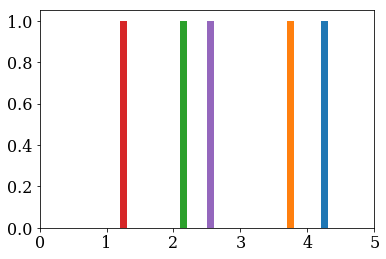

In [2]:
random.seed(0)
for n in range(5):
    num=random.uniform(0,5)
    binwidth=0.1
    pyplot.xlim(0,5)
    pyplot.hist(num,bins=numpy.arange(0.,5., binwidth),normed=False);
   
    print(num)

random.randrange(a,b)donne un integer entre [a,b)

27
12
24
13
1


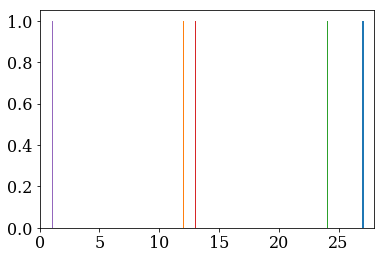

In [ ]:
random.seed(0)
for n in range(5):
    num=random.randrange(0,28)
    binwidth=0.1
    pyplot.xlim(0,28)
    pyplot.hist(num,bins=numpy.arange(0.,28., binwidth),normed=False);
   
    print(num)

random.expovariate(lamda) :exponential distribution 

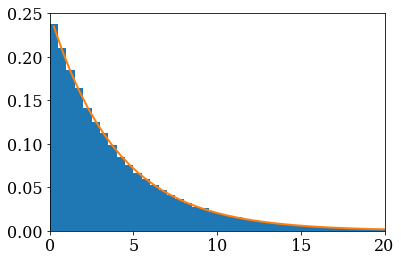

In [ ]:
h=[]  # Empty list for the final set of numbers
alpha= 0.25 # rate of the exponential distribution
for i in range (100000):
    
    y=random.expovariate(1/4)#exponential distribution

    h.append(y)
    

# Plots
binwidth=0.5
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(h,bins,normed=True);

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)


random.gauss(mu, sigma) #gaussien distribution

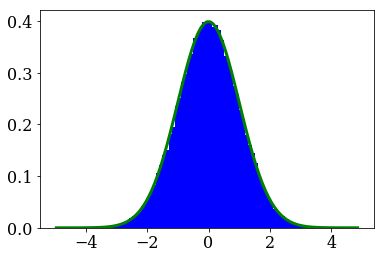

In [ ]:
sigma = 1.0 # standard deviation
mu=0.  #mean

h=[] # Empty list for the final set of numbers

for i in range (100000):
    
    y=random.gauss(mu, sigma) #gaussien distribution

    h.append(y)    

# Plots
binwidth=0.1
bins=numpy.arange(-5.0,5.0, binwidth)
pyplot.hist(h,bins=numpy.arange(-5.0,5.0, binwidth),normed=True,color='blue');
#binwidth=0.1
#bins=numpy.arange(-5.0,5.0, binwidth)
#pyplot.hist(z2,bins=numpy.arange(-5.0,5.0, binwidth),normed=True,color='red');


# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2),lw=3,color='green')


# Von Neumann rejection method

Dans cette méthode, on génère un ensemble de nombres aléatoires avec une distribution donnée
P1(X), Puis extrait un sous-ensemble qui obéit à la distribution désiréeP2(X).
Essayons de produire un ensemble de nombres distribués selon la distribution gaussienne positive. Pour cela, nous pouvons utiliser la distribution exponentielle comme distribution de départ
L'algorithme fonctionne comme suit.
Nous générons un nombre g selon la distribution exponentielle.
Nous établissons un nombre aléatoire U entre 0 et 1
Nous gardons le nombre g dans notre ensemble final de numéros de randoms si
U <p2 (g) / Kp1 (g)


Size of accepted set h and expected size 1/K: 71412 71428.57142857143


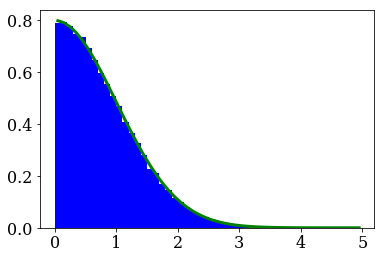

In [ ]:
# Number of random numbers to draw according to p1 
N = 100000
K = 1.4

# Empty list for the final set of numbers
h=[]

for i in range(N):
    
    g=random.expovariate(1)# exponentielle distribution 

    
    # Generate a second number for the acceptance/rejection condition
    u2 =numpy.random.random_sample() 
    
    # Acceptance/rejection step
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        # Append g to the set h
        h.append(g)

# Size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

# Plots
binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),normed=True,color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')

# Transformation Box-Muller      "note2 - challenge 2"

La transformation Box-Muller est une méthode pour générer des nombres aléatoires distribués selon la distribution gaussien  à partir de nombres aléatoires uniformément distribués.supposons que u1 et u2 soient des variables aléatoires indépendantes distribués uniformément entre 0 et 1 et que

<a href="http://www.codecogs.com/eqnedit.php?latex=z_{1}=\sqrt{-2ln(u_{1})}cos(2\pi&space;u_{2})" target="_blank"><img src="http://latex.codecogs.com/gif.latex?z_{1}=\sqrt{-2ln(u_{1})}cos(2\pi&space;u_{2})" title="z_{1}=\sqrt{-2ln(u_{1})}cos(2\pi u_{2})" /></a>

<a href="http://www.codecogs.com/eqnedit.php?latex=z_{2}=\sqrt{-2ln(u_{1})}sin(2\pi&space;u_{2})" target="_blank"><img src="http://latex.codecogs.com/gif.latex?z_{2}=\sqrt{-2ln(u_{1})}sin(2\pi&space;u_{2})" title="z_{2}=\sqrt{-2ln(u_{1})}sin(2\pi u_{2})" /></a>
Alors z1 et z2 sont des variables aléatoires indépendantes avec une distribution gaussien .


# importer des librairies

In [ ]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

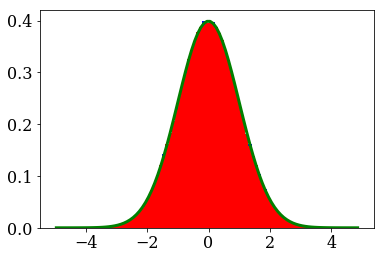

In [ ]:
sigma = 1.0
u1 = numpy.random.random_sample(1000000)# Draw a uniform distribution
u2 = numpy.random.random_sample(1000000)# Draw a second uniform distribution

#transformation Box-Muller

z1 = numpy.sqrt(-2*numpy.log(u1))*numpy.cos(2*numpy.pi*u2)
z2 = numpy.sqrt(-2*numpy.log(u1))*numpy.sin(2*numpy.pi*u2)
    

# Plots
binwidth=0.1
bins=numpy.arange(-5.0,5.0, binwidth)
pyplot.hist(z1,bins=numpy.arange(-5.0,5.0, binwidth),normed=True,color='blue');
binwidth=0.1
bins=numpy.arange(-5.0,5.0, binwidth)
pyplot.hist(z2,bins=numpy.arange(-5.0,5.0, binwidth),normed=True,color='red');


# Compute centers of bins
xc = bins[:-1] + binwidth/2
pyplot.plot(xc,numpy.exp(-xc**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2),lw=3,color='green')


# note 4 challenge

Check that this is not a coincidence and try again for different lattice configurations. You may use the following routine to generate different ones with random initial dipole orientations.

In [ ]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import animation
import matplotlib.cm as cm

In [ ]:
def initial_state(nx,ny):
    """ Creates a lattice with random spin orientations
   
    Parameters:
    ----------
    nx   : int
        Discretization points in x
    ny   : int
        Discretization points in y
   
    Returns:
    -------
    r: 2D array of spins
    """
       
    # Uniform random spins between 0 and 1  
    r = numpy.random.random_integers(0,1,(nx,ny))
    
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [ ]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy


In [ ]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

C:\Users\atefe\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


1.4883049666567134
-0.4
1.49182469764


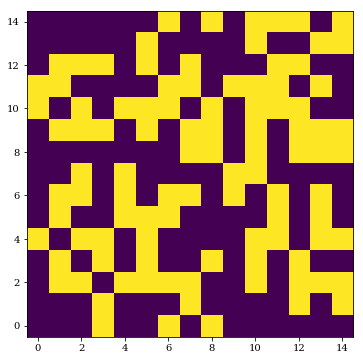

In [ ]:
NMC = 100000
nx=15
ny=15
ix=10
iy=10
# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1
# Initial spins at each site
sp = initial_state(nx,ny)
pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

states = numpy.empty(NMC+1)
states[0]=sp[ix,iy]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,ix,iy)
    states[n]=sp[ix,iy]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)
E_1=(energy_at_site(sp,alpha,-1,ix,iy))
E_2=(energy_at_site(sp,alpha,1,ix,iy))
print(E_2-E_1)
ratio=numpy.exp(-(E_2-E_1))
print(ratio)


C:\Users\atefe\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


1.4965672200724005
-0.4
1.49182469764


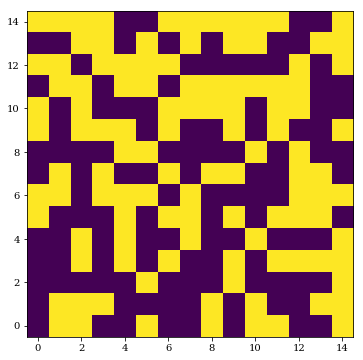

In [ ]:
NMC = 100000
nx=15
ny=15
ix=10
iy=10
# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1
# Initial spins at each site
sp = initial_state(nx,ny)
pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

states = numpy.empty(NMC+1)
states[0]=sp[ix,iy]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,ix,iy)
    states[n]=sp[ix,iy]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)
E_1=(energy_at_site(sp,alpha,-1,ix,iy))
E_2=(energy_at_site(sp,alpha,1,ix,iy))
print(E_2-E_1)
ratio=numpy.exp(-(E_2-E_1))
print(ratio)


C:\Users\atefe\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


2.21853878339234
-0.8
2.22554092849


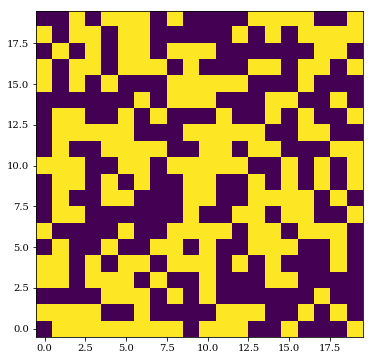

In [ ]:
NMC = 100000
nx=20
ny=20
ix=5
iy=5
# Non-dimensional coupling constant J/(kb*T)
alpha = 0.2
# Initial spins at each site
sp = initial_state(nx,ny)
pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

states = numpy.empty(NMC+1)
states[0]=sp[ix,iy]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,ix,iy)
    states[n]=sp[ix,iy]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)
E_1=(energy_at_site(sp,alpha,-1,ix,iy))
E_2=(energy_at_site(sp,alpha,1,ix,iy))
print(E_2-E_1)
ratio=numpy.exp(-(E_2-E_1))
print(ratio)


C:\Users\atefe\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


1.501876407305479
-0.4
1.49182469764


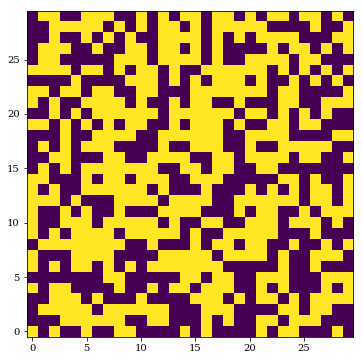

In [ ]:
NMC = 100000
nx=30
ny=30
ix=10
iy=10
# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1
# Initial spins at each site
sp = initial_state(nx,ny)
pyplot.figure(figsize=(6,6))
pyplot.imshow(sp,interpolation="none",origin='lower')

states = numpy.empty(NMC+1)
states[0]=sp[ix,iy]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,ix,iy)
    states[n]=sp[ix,iy]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)
E_1=(energy_at_site(sp,alpha,-1,ix,iy))
E_2=(energy_at_site(sp,alpha,1,ix,iy))
print(E_2-E_1)
ratio=numpy.exp(-(E_2-E_1))
print(ratio)


on voit bien que ce n'est pas une coïncidence.

# Note 4 challenge 1

Perform a series of runs with α∈[01] and plot the average energy of the system and its magnetisation as a function of 
α. Estimate the critical value of α at which the phase transition occurs. Is it compatible with Onsager's exact solution for the system?